In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_data = pd.read_csv("sales_data.csv")
sales_data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230,1
1,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312,2
2,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695,3
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671,4
4,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310,5


In [3]:
sales_data.set_index('transaction_id', inplace=True)
sales_data.head()


,store_id,customer_id,product_id,product_category,date,amount,single_price
transaction_id,,,,,,,
1,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230
2,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312
3,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695
4,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671
5,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310


In [4]:
sales_data['amount'].fillna(sales_data['amount'].mean(), inplace=True)
sales_data['single_price'].fillna(sales_data['single_price'].mean(), inplace=True)
sales_data['product_category'].fillna(sales_data['product_category'].mode()[0], inplace=True)
sales_data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price
transaction_id,,,,,,,
1,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230
2,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312
3,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695
4,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671
5,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310


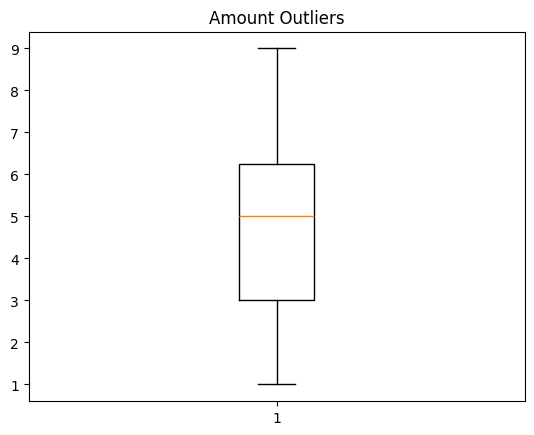

In [5]:
plt.boxplot(sales_data['amount'])
plt.title('Amount Outliers')
plt.show()

q1 = sales_data['amount'].quantile(0.25)
q3 = sales_data['amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
sales_data['amount'] = sales_data['amount'].clip(lower_bound, upper_bound)


In [6]:
sales_data.drop(['customer_id', 'store_id'], axis=1, inplace=True)
sales_data.head()

,product_id,product_category,date,amount,single_price
transaction_id,,,,,
1,53642,Toys,4/1/2007 8:09,3,90.246230
2,90945,Movies,2/15/2005 10:47,2,60.586312
3,18548,Movies,9/27/2007 5:38,5,96.612695
4,85359,Books,5/7/2005 13:19,5,16.962671
5,80069,Clothing,1/6/2008 17:36,5,65.215310


In [7]:
# sales_data = pd.get_dummies(sales_data, columns=['product_category'], drop_first=True)
# sales_data = sales_data.replace({True: 1, False: 2})
# sales_data.head()

In [8]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['day'] = sales_data['date'].dt.day

sales_data['total_price'] = sales_data['amount'] * sales_data['single_price']
sales_data.head()

,product_id,product_category,date,amount,single_price,year,month,day,total_price
transaction_id,,,,,,,,,
1,53642,Toys,2007-04-01 08:09:00,3,90.246230,2007,4,1,270.738691
2,90945,Movies,2005-02-15 10:47:00,2,60.586312,2005,2,15,121.172625
3,18548,Movies,2007-09-27 05:38:00,5,96.612695,2007,9,27,483.063475
4,85359,Books,2005-05-07 13:19:00,5,16.962671,2005,5,7,84.813354
5,80069,Clothing,2008-01-06 17:36:00,5,65.215310,2008,1,6,326.076552


In [9]:
max_amount = sales_data['amount'].max()
print("Max amount:", max_amount)
if max_amount <= 9:
    bins = [0, 3, 6, max_amount] 
    labels = [0, 1, 2] 
else:
    bins = [0, 50, 150, max_amount]
    labels = [0, 1, 2]
sales_data['amount_category'] = pd.cut(sales_data['amount'], bins=bins, labels=labels)
sales_data.head()



Max amount: 9


,product_id,product_category,date,amount,single_price,year,month,day,total_price,amount_category
transaction_id,,,,,,,,,,
1,53642,Toys,2007-04-01 08:09:00,3,90.246230,2007,4,1,270.738691,0
2,90945,Movies,2005-02-15 10:47:00,2,60.586312,2005,2,15,121.172625,0
3,18548,Movies,2007-09-27 05:38:00,5,96.612695,2007,9,27,483.063475,1
4,85359,Books,2005-05-07 13:19:00,5,16.962671,2005,5,7,84.813354,1
5,80069,Clothing,2008-01-06 17:36:00,5,65.215310,2008,1,6,326.076552,1


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sales_data[['amount', 'single_price', 'total_price']] = scaler.fit_transform(sales_data[['amount', 'single_price', 'total_price']])
sales_data.head()

,product_id,product_category,date,amount,single_price,year,month,day,total_price,amount_category
transaction_id,,,,,,,,,,
1,53642,Toys,2007-04-01 08:09:00,-0.660504,1.349201,2007,4,1,0.120787,0
2,90945,Movies,2005-02-15 10:47:00,-1.068223,0.193748,2005,2,15,-0.711990,0
3,18548,Movies,2007-09-27 05:38:00,0.154933,1.597218,2007,9,27,1.303002,1
4,85359,Books,2005-05-07 13:19:00,0.154933,-1.505686,2005,5,7,-0.914437,1
5,80069,Clothing,2008-01-06 17:36:00,0.154933,0.374079,2008,1,6,0.428906,1


In [11]:
sales_data.dtypes

product_id                   int64
product_category            object
date                datetime64[ns]
amount                     float64
single_price               float64
year                         int32
month                        int32
day                          int32
total_price                float64
amount_category           category
dtype: object

In [12]:
sales_data.head()

,product_id,product_category,date,amount,single_price,year,month,day,total_price,amount_category
transaction_id,,,,,,,,,,
1,53642,Toys,2007-04-01 08:09:00,-0.660504,1.349201,2007,4,1,0.120787,0
2,90945,Movies,2005-02-15 10:47:00,-1.068223,0.193748,2005,2,15,-0.711990,0
3,18548,Movies,2007-09-27 05:38:00,0.154933,1.597218,2007,9,27,1.303002,1
4,85359,Books,2005-05-07 13:19:00,0.154933,-1.505686,2005,5,7,-0.914437,1
5,80069,Clothing,2008-01-06 17:36:00,0.154933,0.374079,2008,1,6,0.428906,1


In [13]:
sales_data = pd.get_dummies(sales_data, columns=['product_category'], drop_first=True)
sales_data = sales_data.replace({True: 1, False: 2})
sales_data.head()

,product_id,date,amount,single_price,year,month,day,total_price,amount_category,product_category_Clothing,product_category_Electronics,product_category_Health,product_category_Home/Garden,product_category_Movies,product_category_Sports,product_category_Toys
transaction_id,,,,,,,,,,,,,,,,
1,53642,2007-04-01 08:09:00,-0.660504,1.349201,2007,4,1,0.120787,0,2,2,2,2,2,2,1
2,90945,2005-02-15 10:47:00,-1.068223,0.193748,2005,2,15,-0.711990,0,2,2,2,2,1,2,2
3,18548,2007-09-27 05:38:00,0.154933,1.597218,2007,9,27,1.303002,1,2,2,2,2,1,2,2
4,85359,2005-05-07 13:19:00,0.154933,-1.505686,2005,5,7,-0.914437,1,2,2,2,2,2,2,2
5,80069,2008-01-06 17:36:00,0.154933,0.374079,2008,1,6,0.428906,1,1,2,2,2,2,2,2


In [14]:
print(sales_data.columns)


Index(['product_id', 'date', 'amount', 'single_price', 'year', 'month', 'day',
       'total_price', 'amount_category', 'product_category_Clothing',
       'product_category_Electronics', 'product_category_Health',
       'product_category_Home/Garden', 'product_category_Movies',
       'product_category_Sports', 'product_category_Toys'],
      dtype='object')


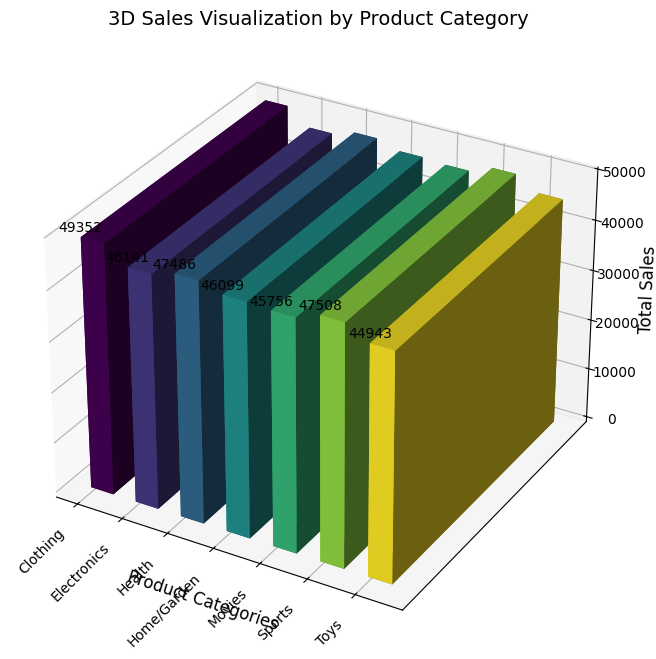

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to process data
def load_and_process_data(sales_data):
    sales_data = pd.get_dummies(sales_data, columns=['product_category'], drop_first=True)
    sales_data = sales_data.replace({True: 1, False: 2})
    
    sales_data['date'] = pd.to_datetime(sales_data['date'])
    sales_data['year'] = sales_data['date'].dt.year
    sales_data['month'] = sales_data['date'].dt.month
    sales_data['day'] = sales_data['date'].dt.day
    
    sales_data['total_price'] = sales_data['amount'] * sales_data['single_price']
    
    return sales_data

# Improved visualization function
def visualize_data_bar_chart(sales_data):
    # Aggregate sales data by product category
    sales_data['Clothing_sales'] = sales_data['product_category_Clothing'] * sales_data['total_price']
    sales_data['Electronics_sales'] = sales_data['product_category_Electronics'] * sales_data['total_price']
    sales_data['Health_sales'] = sales_data['product_category_Health'] * sales_data['total_price']
    sales_data['Home/Garden_sales'] = sales_data['product_category_Home/Garden'] * sales_data['total_price']
    sales_data['Movies_sales'] = sales_data['product_category_Movies'] * sales_data['total_price']
    sales_data['Sports_sales'] = sales_data['product_category_Sports'] * sales_data['total_price']
    sales_data['Toys_sales'] = sales_data['product_category_Toys'] * sales_data['total_price']

    # Aggregate total sales by category
    total_sales_by_category = {
        'Clothing': sales_data['Clothing_sales'].sum(),
        'Electronics': sales_data['Electronics_sales'].sum(),
        'Health': sales_data['Health_sales'].sum(),
        'Home/Garden': sales_data['Home/Garden_sales'].sum(),
        'Movies': sales_data['Movies_sales'].sum(),
        'Sports': sales_data['Sports_sales'].sum(),
        'Toys': sales_data['Toys_sales'].sum(),
    }

    # Convert to arrays for visualization
    cube_data = np.array(list(total_sales_by_category.values()))
    categories = list(total_sales_by_category.keys())
    colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))  # Distinct colors for each category
    
    # 3D Bar Chart
    x = np.arange(len(categories))
    y = np.zeros_like(x)
    dx = dy = 0.5
    dz = cube_data

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.bar3d(x, y, np.zeros_like(x), dx, dy, dz, color=colors, shade=True)

    # Set labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
    ax.set_yticks([])
    ax.set_xlabel('Product Categories', fontsize=12)
    ax.set_zlabel('Total Sales', fontsize=12)
    ax.set_title('3D Sales Visualization by Product Category', fontsize=14)

    # Annotate bars with exact values
    for i in range(len(x)):
        ax.text(x[i], y[i], dz[i] + dz.max() * 0.02, f'{int(dz[i])}', 
                color='black', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Load and process the data
sales_data = pd.read_csv("sales_data.csv")  # Adjust path as needed
sales_data = load_and_process_data(sales_data)

# Visualize the data
visualize_data_bar_chart(sales_data)
